# Explore here

In [2]:
import pandas as pd
print(pd.__version__)

2.3.3


In [3]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns

output_dir = "../data/raw"
output_path = os.path.join(output_dir, "AB_NYC_2019.csv")

url = "https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv"

# Descargar el archivo desde la URL
response = requests.get(url)

# Guardar el contenido descargado en el archivo local
with open(output_path, "wb") as f:
    f.write(response.content)



In [4]:
#Conocimiento del dataset
df = pd.read_csv(output_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#Conocimiento del dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
#Mirar si hay duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


In [7]:
#Selección de atributos relevantes
df.drop(["id", "host_name", "last_review", "name"], axis = 1, inplace = True)

df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Análisis univariante

In [8]:
#neighbourhood_group
num_barrios = df['neighbourhood_group'].value_counts()
print(num_barrios)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


<Axes: xlabel='neighbourhood_group'>

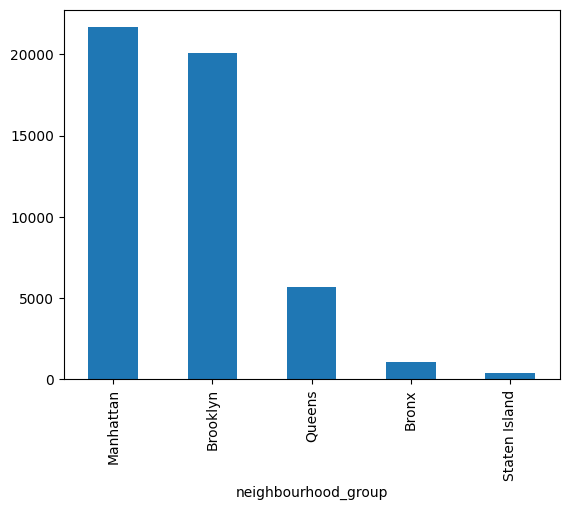

In [9]:
num_barrios.plot(kind='bar')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

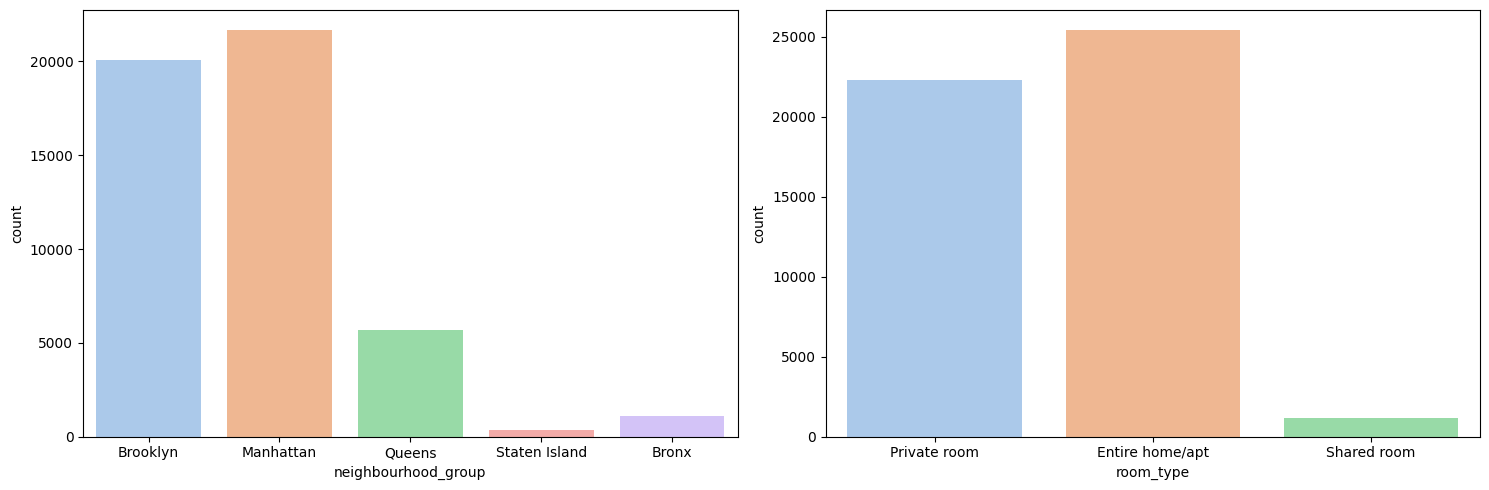

In [27]:
fig, axis = plt.subplots(1, 2, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", palette='pastel', hue= "neighbourhood_group", legend=False)
sns.countplot(ax = axis[1], data = df, x = "room_type", palette='pastel', hue= "room_type", legend=False)


plt.tight_layout()
plt.show()

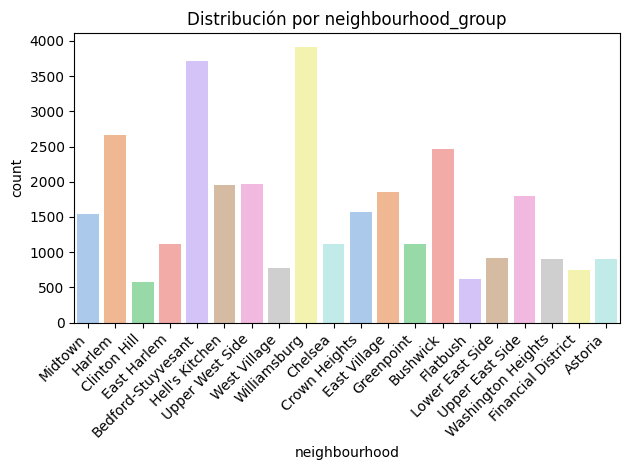

In [43]:
#Countplot del filtrado de los barrios con más immuebles
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(20).index
sns.countplot(data=df[df['neighbourhood'].isin(top_neighbourhoods)], x="neighbourhood", palette='pastel', hue="neighbourhood", legend=False)
plt.title("Distribución por neighbourhood_group")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Cálculo de las estadísticas descriptivas de los precios según el neighbourhood group
groups = df['neighbourhood_group'].unique()
for i, group in enumerate(groups):
    sub = df[df['neighbourhood_group'] == group]
    print(group)
    print(sub['price'].describe())
    print('===========')


Brooklyn
count    20104.000000
mean       124.383207
std        186.873538
min          0.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64
Manhattan
count    21661.000000
mean       196.875814
std        291.383183
min          0.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64
Queens
count     5666.000000
mean        99.517649
std        167.102155
min         10.000000
25%         50.000000
50%         75.000000
75%        110.000000
max      10000.000000
Name: price, dtype: float64
Staten Island
count     373.000000
mean      114.812332
std       277.620403
min        13.000000
25%        50.000000
50%        75.000000
75%       110.000000
max      5000.000000
Name: price, dtype: float64
Bronx
count    1091.000000
mean       87.496792
std       106.709349
min         0.000000
25%        45.000000
50%        65.000000
75%        99.000000

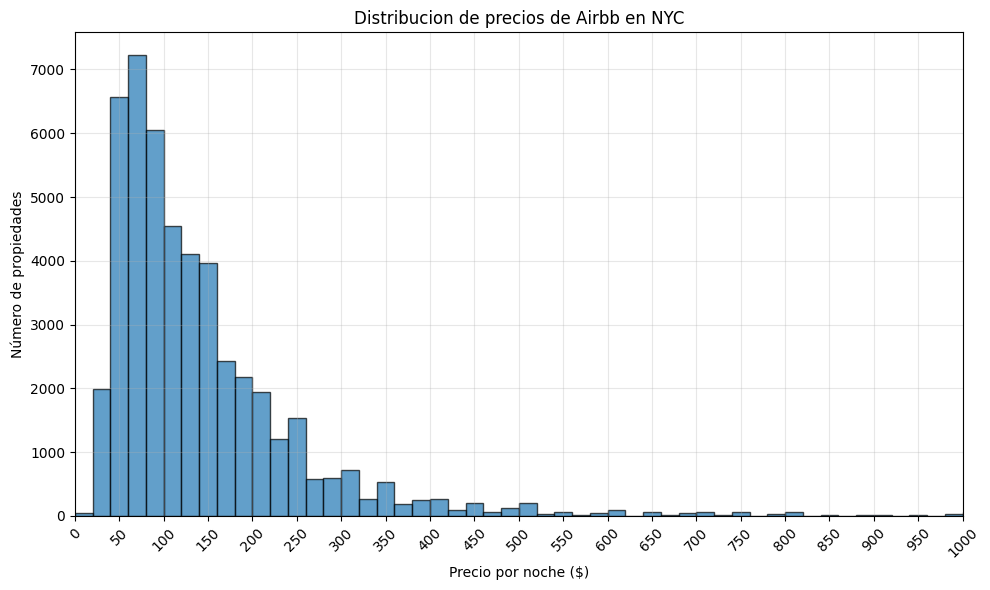

In [47]:
#Histograma de precios
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=500, edgecolor= 'black', alpha= 0.7)
plt. title('Distribucion de precios de Airbb en NYC')
plt.xlabel('Precio por noche ($)')
plt.ylabel('Número de propiedades')
plt.xticks(range(0, 1001, 50), rotation=45) 
plt.xlim(0,1000)
plt.grid(True, alpha=0.3)
plt. tight_layout()
plt.show()

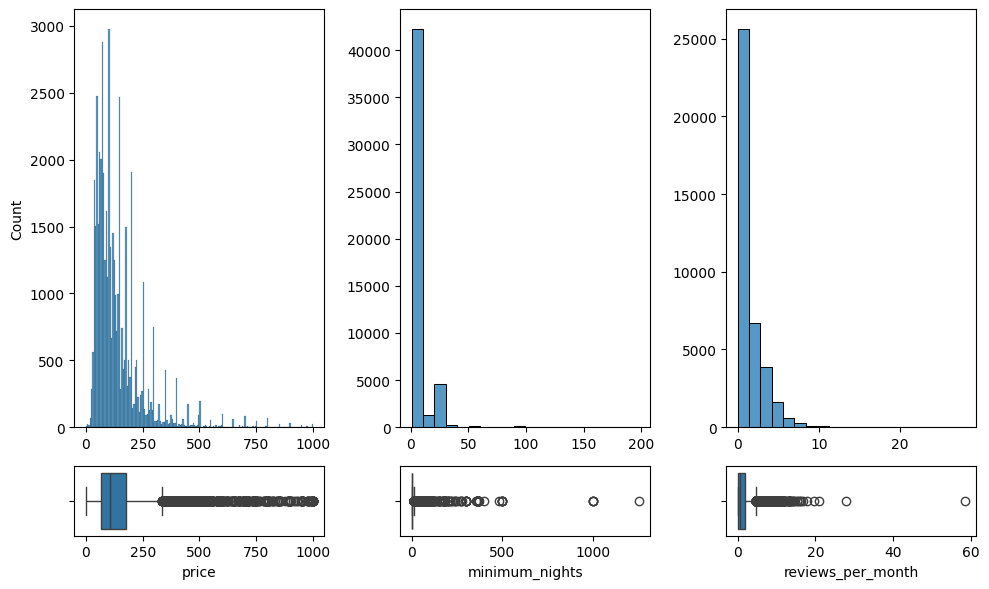

In [74]:
#Conocer la distribución y características estadísticas de variables numéricas.
fig, axis = plt.subplots(2, 3, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = df[df['price'] < 1000], x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df[df['price'] < 1000], x = "price")

sns.histplot(ax = axis[0, 1], data = df[df['minimum_nights'] < 200], x = "minimum_nights", bins=20).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[0, 2], data = df[df['reviews_per_month'] < 40], x = "reviews_per_month", bins=20).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "reviews_per_month")


plt.tight_layout()
plt.show()

<Axes: xlabel='availability_365'>

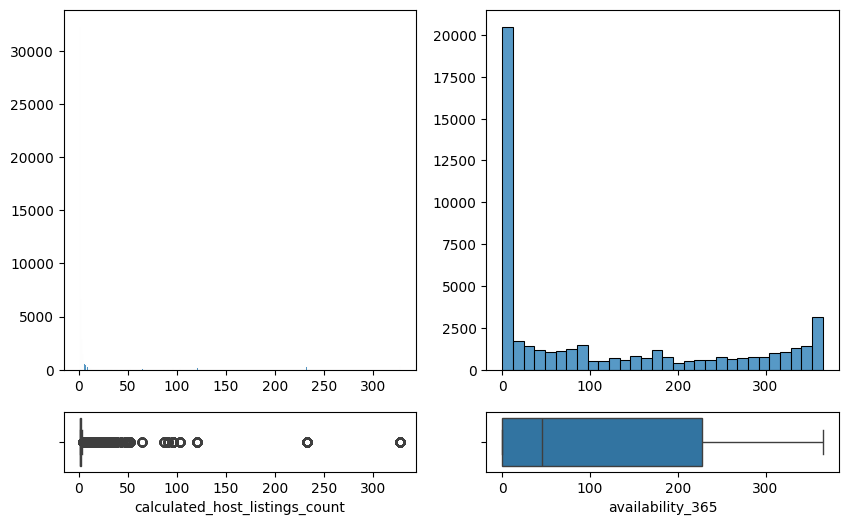

In [53]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "calculated_host_listings_count")

sns.histplot(ax = axis[0, 1], data = df, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "availability_365")



Text(0.5, 1.0, 'Ubications map by neighbourhood')

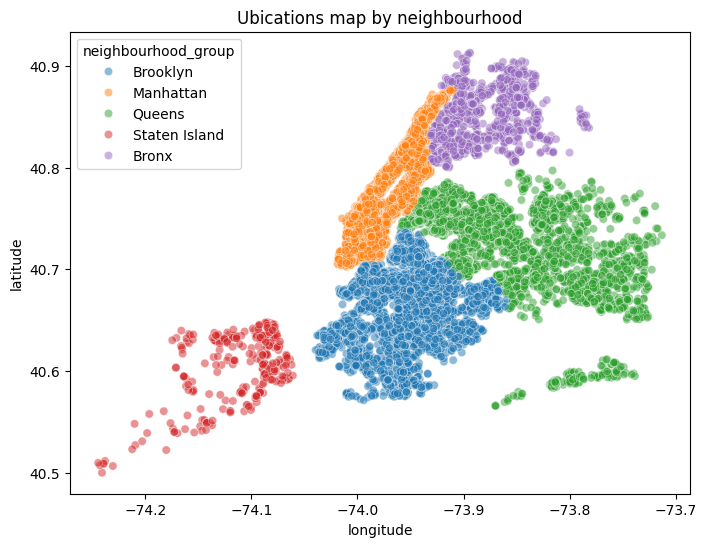

In [ ]:
#scatterplot para ver la distribución de los pisos en los barrios de NYC
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.5)
plt.title('Ubications map by neighbourhood')

### Análisis multivariante

#### Análisis numérico-numérico

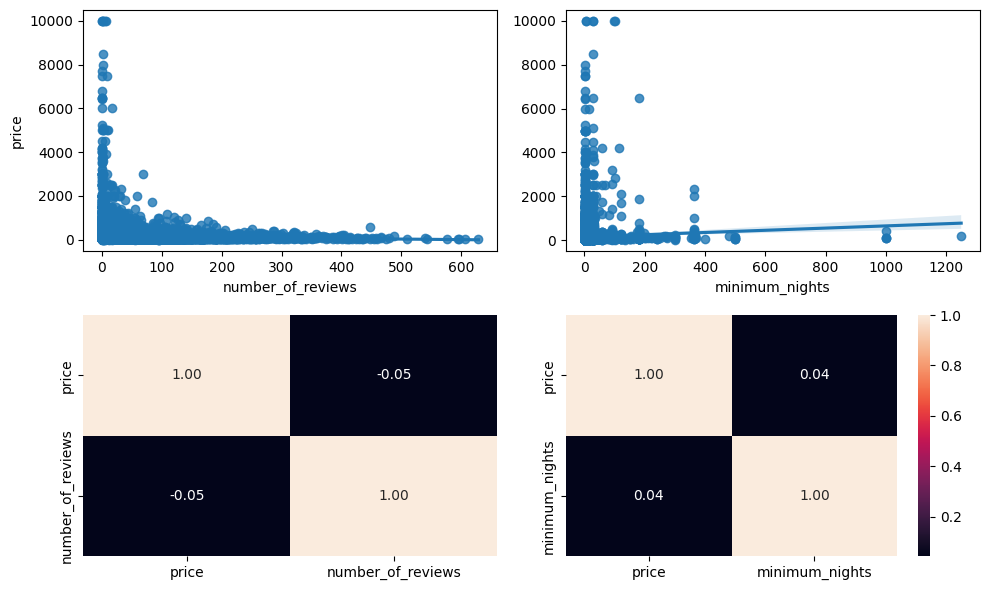

In [88]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "number_of_reviews", y = "price")
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

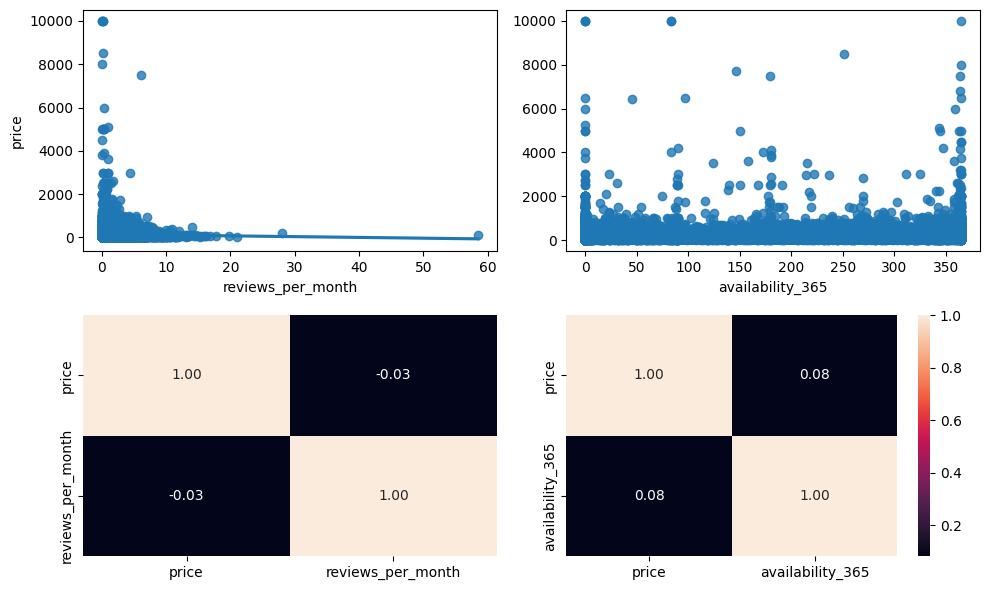

In [90]:
fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "reviews_per_month", y = "price")
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

plt.tight_layout()
plt.show()

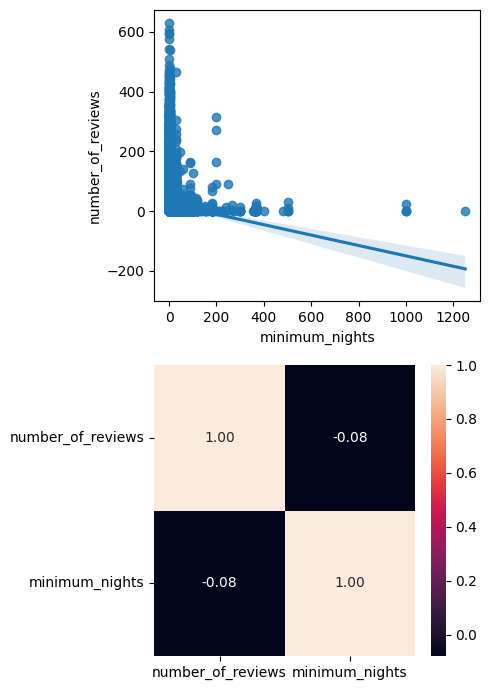

In [92]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = df, x = "minimum_nights", y = "number_of_reviews")
sns.heatmap(df[["number_of_reviews", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1])


plt.tight_layout()
plt.show()

In [ ]:
#Media de precios según el host_id
host_avg = df.groupby("host_id")["price"].mean().reset_index()
print(host_avg)

         host_id       price
0           2438   95.000000
1           2571  182.000000
2           2787  100.666667
3           2845  162.000000
4           2868   60.000000
...          ...         ...
37452  274273284  140.000000
37453  274298453   54.000000
37454  274307600  190.000000
37455  274311461  200.000000
37456  274321313  125.000000

[37457 rows x 2 columns]


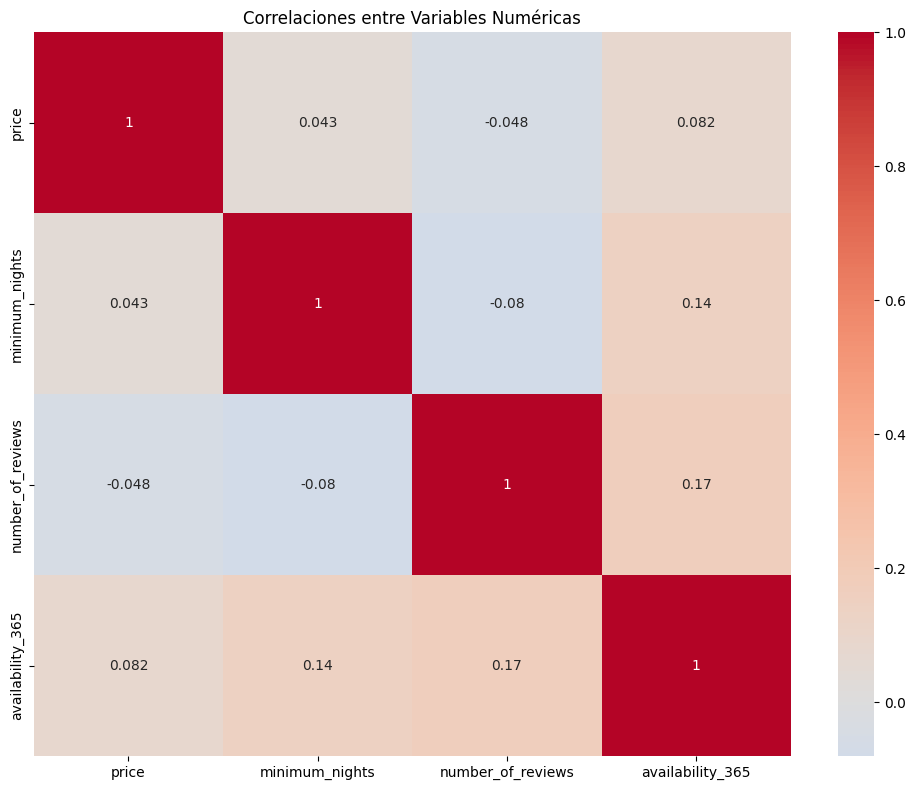

In [110]:
# Mapa de calor de correlaciones variables numéricas
plt.figure(figsize=(10, 8))
numeric_cols=['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt. title('Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

#### Análisis categórico-categórico

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

/tmp/ipykernel_1354/2098573275.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')


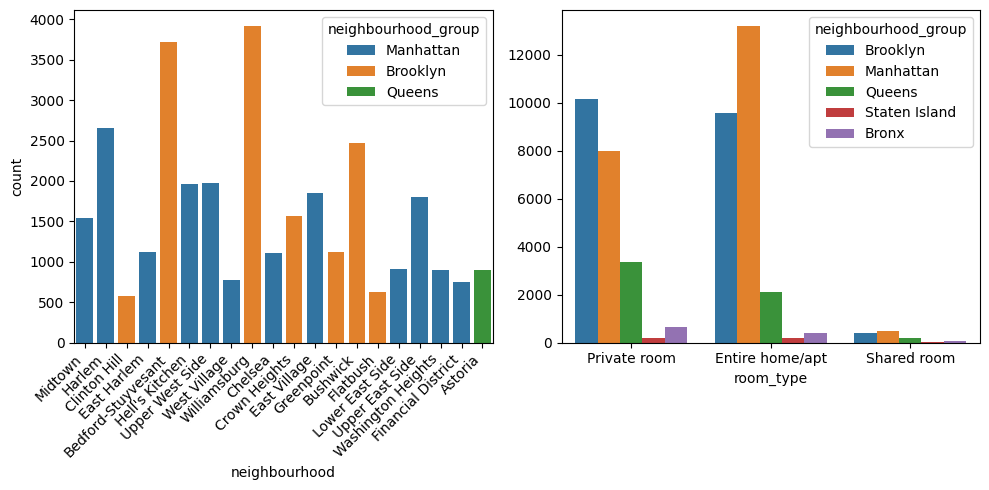

In [103]:
fig, axis = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(ax = axis[0], data = df[df['neighbourhood'].isin(top_neighbourhoods)], x = "neighbourhood", hue = "neighbourhood_group")
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
sns.countplot(ax = axis[1], data = df, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)

plt.tight_layout()
plt.show()

<Axes: xlabel='room_type'>

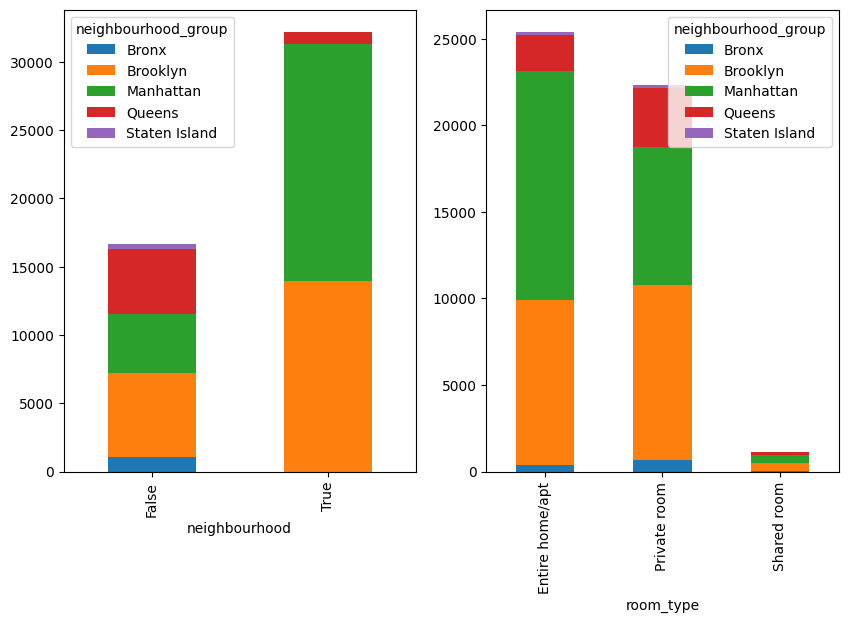

In [109]:
fig, axis = plt.subplots(1, 2, figsize = (10, 6))

crosstab_neighbourhood = pd.crosstab(df['neighbourhood'].isin(top_neighbourhoods), df['neighbourhood_group'])
crosstab_neighbourhood.div(crosstab_neighbourhood.sum(1).astype(float), axis=0)
crosstab_neighbourhood.plot(kind='bar', stacked=True, ax = axis[0])

crosstab_room = pd.crosstab(df['room_type'], df['neighbourhood_group'])
crosstab_room.div(crosstab_room.sum(1).astype(float), axis=0)
crosstab_room.plot(kind='bar', stacked=True, ax = axis[1])

#### Análisis numérico-categórico

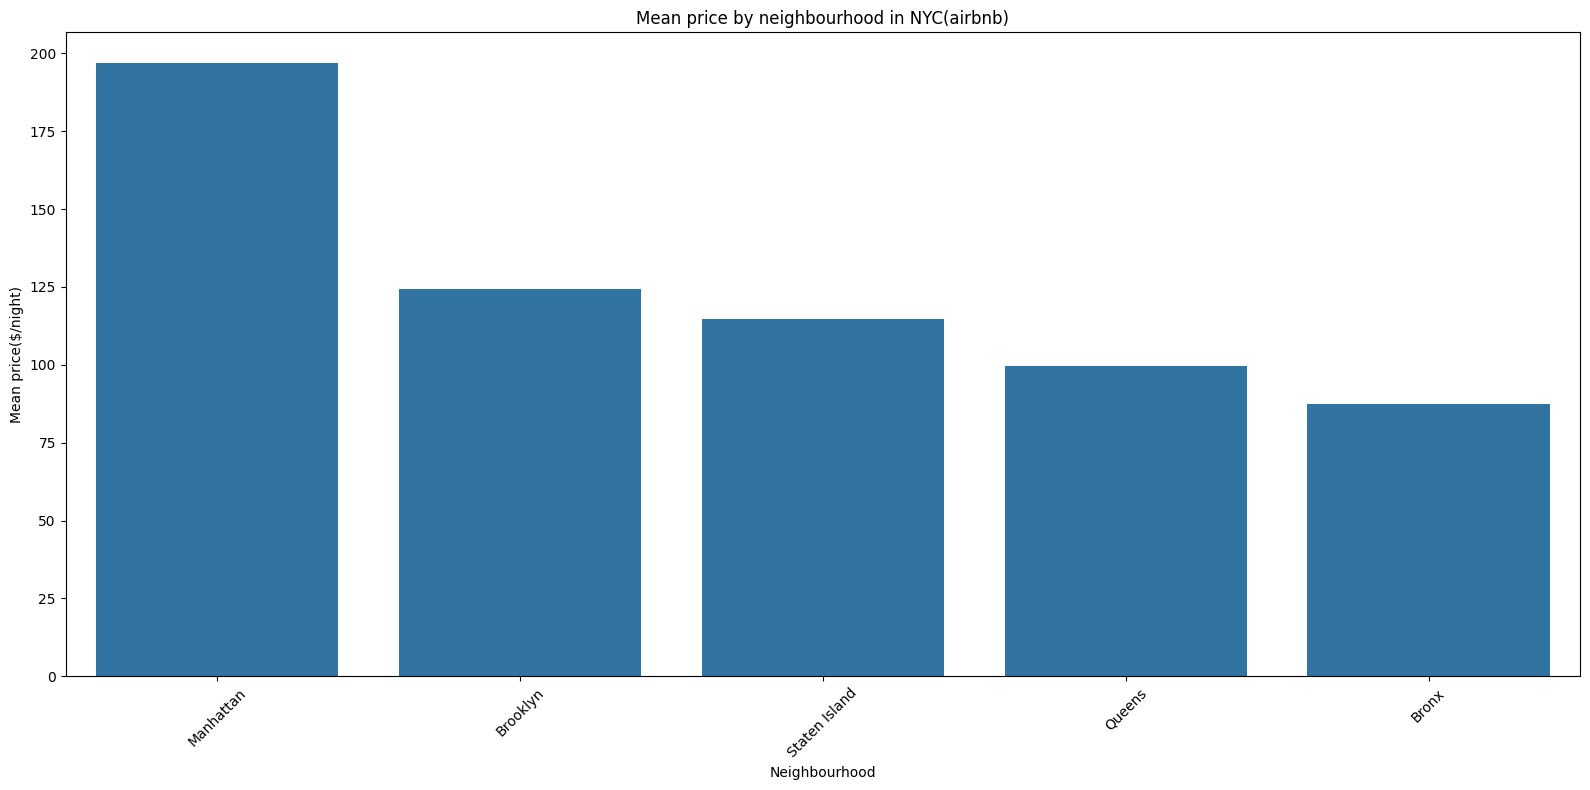

In [ ]:
#Gráfico de barras de la media de precio por barrio
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False)

plt.figure(figsize=(16,8))
sns.barplot(x=avg_price.index, y=avg_price.values)

plt.xticks(rotation = 45)
plt.title('Mean price by neighbourhood in NYC(airbnb)')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean price($/night)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1354/1940006580.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1354/1940006580.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1354/1940006580.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=60, ha='right')


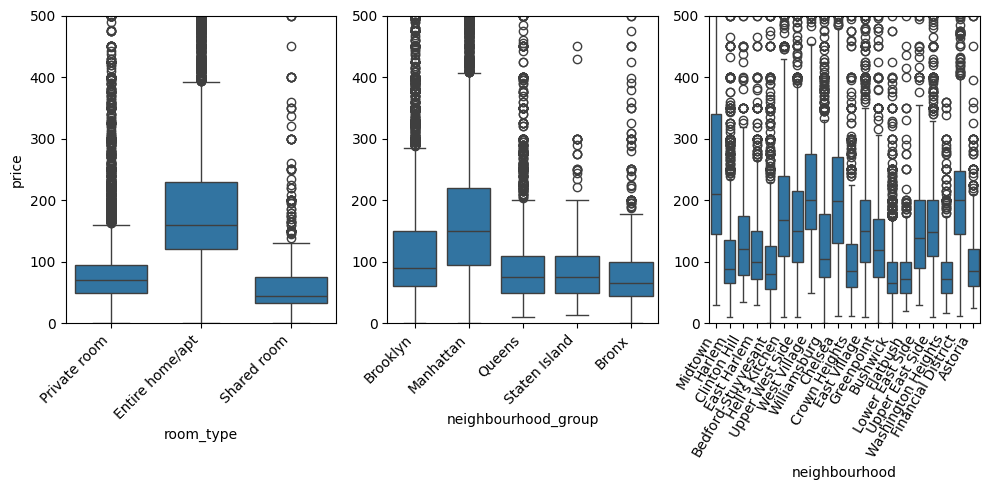

In [ ]:
#Distribución de precios según tipo de habitación, grupo de barrio y barrio
fig, axis = plt.subplots(1, 3, figsize = (10, 5))
sns.boxplot(ax= axis[0], data=df, x='room_type', y='price')
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
axis[0].set_ylabel("price")
axis[0].set_ylim(0, 500)

sns.boxplot(ax = axis[1], data = df, x = "neighbourhood_group", y= "price")
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')
axis[1].set_ylabel(None)
axis[1].set_ylim(0, 500)

sns.boxplot(ax = axis[2], data = df[df['neighbourhood'].isin(top_neighbourhoods)], x = "neighbourhood", y= "price").set(ylabel = None)
axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=60, ha='right')
axis[2].set_ylabel(None)
axis[2].set_ylim(0, 500)


plt.tight_layout()
plt.show()

/tmp/ipykernel_1354/3416789208.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_1354/3416789208.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=60, ha='right')
/tmp/ipykernel_1354/3416789208.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=45, ha='right')


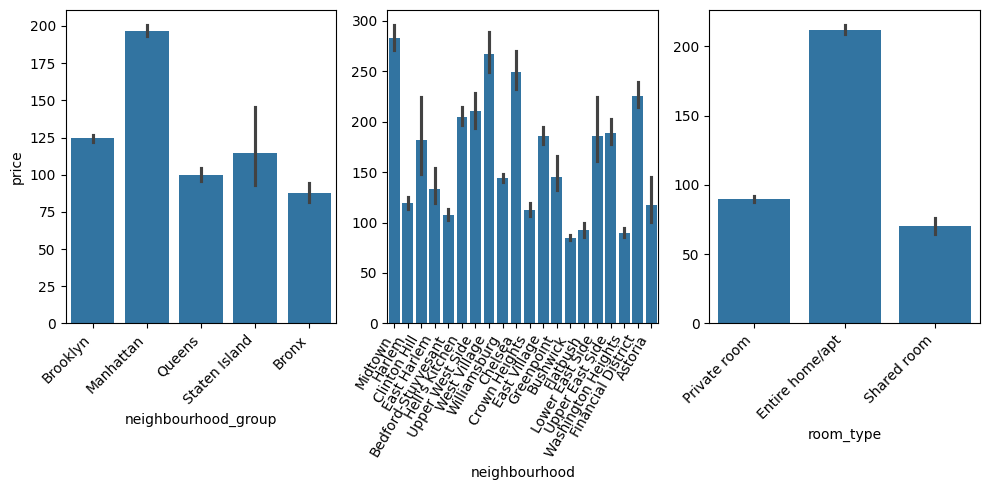

In [ ]:
#Precio medio por grupo de barrio, barrio y tipo de habitación
fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.barplot(ax = axis[0], data = df, x = "neighbourhood_group", y= "price")
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')
sns.barplot(ax = axis[1], data = df[df['neighbourhood'].isin(top_neighbourhoods)], x = "neighbourhood", y= "price").set(ylabel = None)
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=60, ha='right')
sns.barplot(ax = axis[2], data = df, x = "room_type", y= "price").set(ylabel = None)
axis[2].set_xticklabels(axis[2].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [ ]:
#Análisis de correlaciones
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["Embarked_n"] = pd.factorize(df["Embarked"])[0]